In [200]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
import datetime
from matplotlib import pyplot as plt
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [87]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareR.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundEB.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundL.ttf'),
 ('Nanum Brush Script', 'C:\\Windows\\Fonts\\NanumBrush.ttf'),
 ('NanumBarunpen', 'C:\\Windows\\Fonts\\NanumBarunpenB.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('Nanum Pen Script', 'C:\\Windows\\Fonts\\NanumPen.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareL.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'),
 ('NanumGothic', 'C:\\Windows\\F

In [88]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

# 데이터 읽기

In [201]:
txi = pd.read_csv("data/call_taxi.csv", encoding= 'euc-kr')

In [202]:
dis = pd.read_csv("data/dis_pop.csv",encoding = 'euc-kr')

In [203]:
txi.head(10)

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지(구),출발지(동),목적지(구),목적지(동)
0,9568,중형승합,2018-01-01 00:03:00,2018-01-01 02:19:23,2018-01-01 02:48:48,중구,명동,용산구,한강로동
1,7638,중형승합,2018-01-01 00:04:00,2018-01-01 02:24:19,2018-01-01 02:46:04,서초구,반포1동,강서구,등촌제3동
2,5807,중형승합,2018-01-01 00:08:00,2018-01-01 02:27:53,2018-01-01 02:48:29,강북구,인수동,노원구,하계2동
3,1061,중형승합,2018-01-01 00:21:00,2018-01-01 03:48:11,2018-01-01 03:59:29,관악구,청림동,성북구,안암동
4,7658,중형승합,2018-01-01 00:25:00,2018-01-01 03:55:17,2018-01-01 04:17:58,노원구,월계1동,노원구,상계5동
5,9568,중형승합,2018-01-01 00:26:00,2018-01-01 03:10:37,2018-01-01 03:29:05,용산구,청파동,금천구,시흥제1동
6,9568,중형승합,2018-01-01 00:26:00,2018-01-01 04:11:45,2018-01-01 04:26:14,구로구,구로제3동,관악구,성현동
7,1061,중형승합,2018-01-01 00:27:00,2018-01-01 02:42:20,2018-01-01 03:15:58,강서구,방화제1동,동작구,노량진제1동
8,7658,중형승합,2018-01-01 00:31:00,2018-01-01 02:47:07,2018-01-01 03:01:41,영등포구,여의동,강북구,우이동
9,7650,중형승합,2018-01-01 00:34:00,2018-01-01 04:03:50,2018-01-01 04:17:26,송파구,잠실7동,관악구,행운동


In [204]:
dis.head()

,기준년도,구,동,합계
0,2018,종로구,소계,"6,017"
1,2018,종로구,사직동,309
2,2018,종로구,삼청동,118
3,2018,종로구,부암동,325
4,2018,종로구,평창동,542


In [205]:
start = pd.DataFrame(txi.groupby('출발지(구)')['출발지(동)'].count().sort_values(ascending=False))

Text(0, 0.5, '출발지(동)')

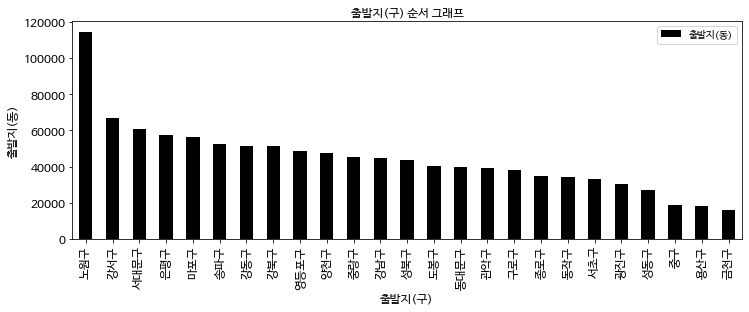

In [206]:
sta_ax = start.plot(kind='bar', title='출발지(구) 순서 그래프', figsize=(12, 4), legend=True, fontsize=12, color='black')
sta_ax.set_xlabel('출발지(구)', fontsize=12)
sta_ax.set_ylabel('출발지(동)', fontsize=12)

In [207]:
arrive =  pd.DataFrame(txi.groupby('목적지(구)')['목적지(동)'].count().sort_values(ascending=False))

Text(0, 0.5, '도착지(동)')

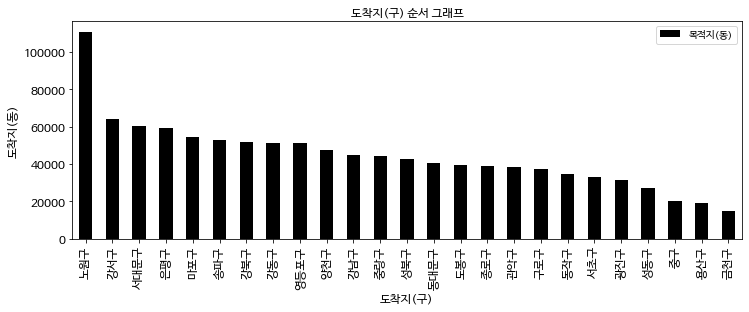

In [208]:
ari_ax = arrive.plot(kind='bar', title='도착지(구) 순서 그래프', figsize=(12, 4), legend=True, fontsize=12, color='black')
ari_ax.set_xlabel('도착지(구)', fontsize=12)
ari_ax.set_ylabel('도착지(동)', fontsize=12)

In [215]:
datetime.datetime.strptime(txi['예정일시'][1], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2018, 1, 1, 0, 4)